In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import *
import seaborn as sns
import numpy as np

In [5]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)


def plot_dendrogram(Z, labels=None,
                    figsize=(10, 40),
                    title="Hierarchical Clustering Dendrogram",
                    x_label="Distances", y_label="Clusters",
                    orientation="top" ) :
    """
    Affiche un dendrogramme horizontal à partir d'une matrice de linkage déjà calculée

    Paramètres :
    ------------
    Z : array-like
        Matrice de linkage obtenue via scipy.cluster.hierarchy.linkage.
    labels : list ou None
        Noms à afficher sur les feuilles du dendrogramme.
    figsize : tuple
        Taille de la figure (largeur, hauteur).
    title : str
        Titre du graphique
    orientation : str
        Orientation du dendogramme.
    """

    fig, ax = plt.subplots(1, 1, figsize=figsize)

    dendrogram(
        Z,
        ax=ax,
        labels=labels,
        orientation=orientation,
        leaf_font_size=15
    )

    plt.title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.tight_layout()
    plt.show()

In [6]:
data = np.column_stack([
    np.random.randn(200) * 1,
    np.random.randn(200) * 5
    ])

data = pd.DataFrame(data)
data.head()

,0,1
0,-1.274759,-1.569211
1,-1.009901,-0.399294
2,-0.563775,6.806475
3,-1.013756,6.034194
4,1.466172,6.236650


# Analyse Univariée

In [7]:
data.describe()

,0,1
count,200.000000,200.000000
mean,-0.119117,0.055777
std,0.911970,4.759058
min,-2.771316,-13.579768
25%,-0.708035,-2.822582
50%,-0.069050,-0.020515
75%,0.545543,3.205053
max,1.910200,12.245176


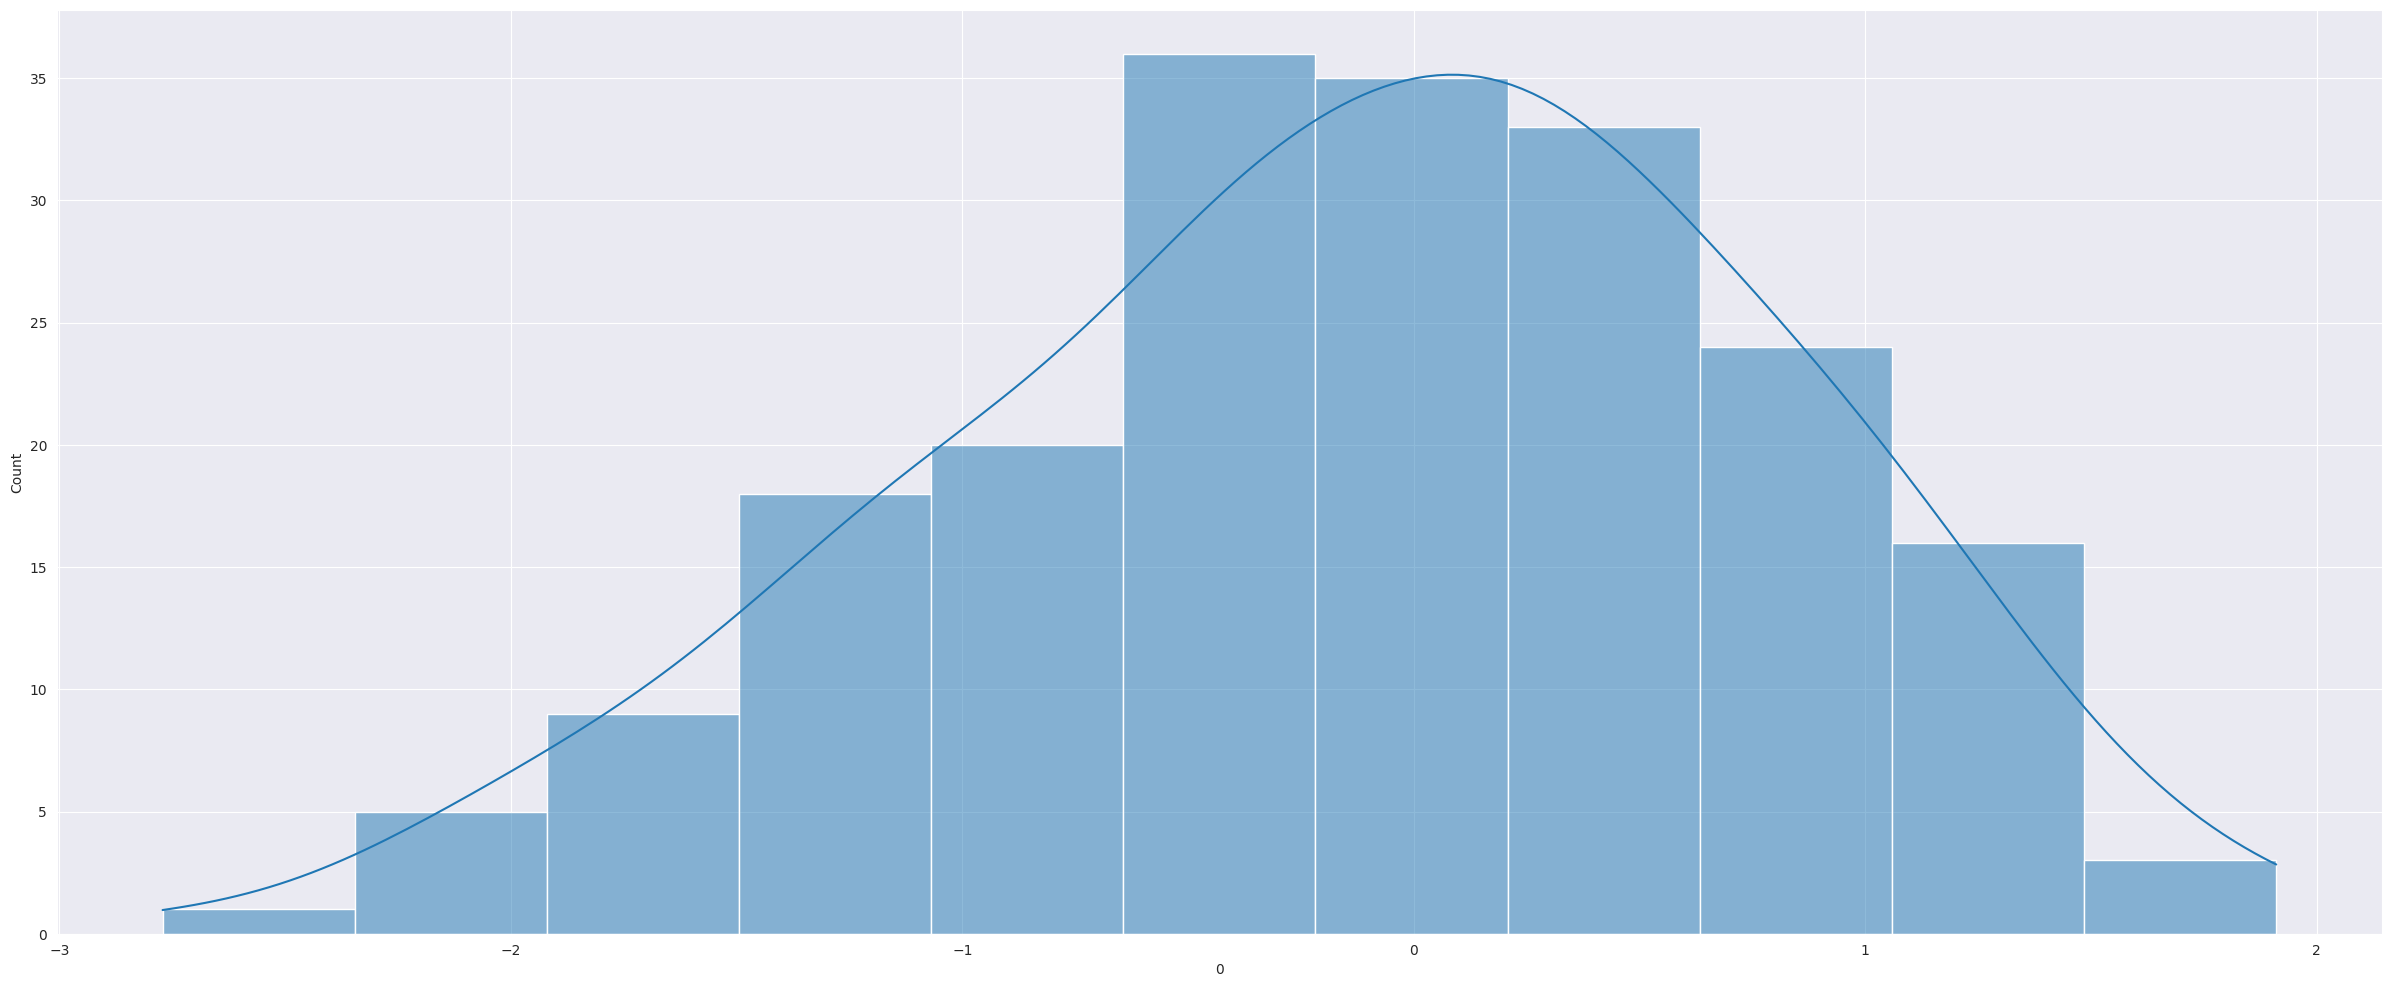

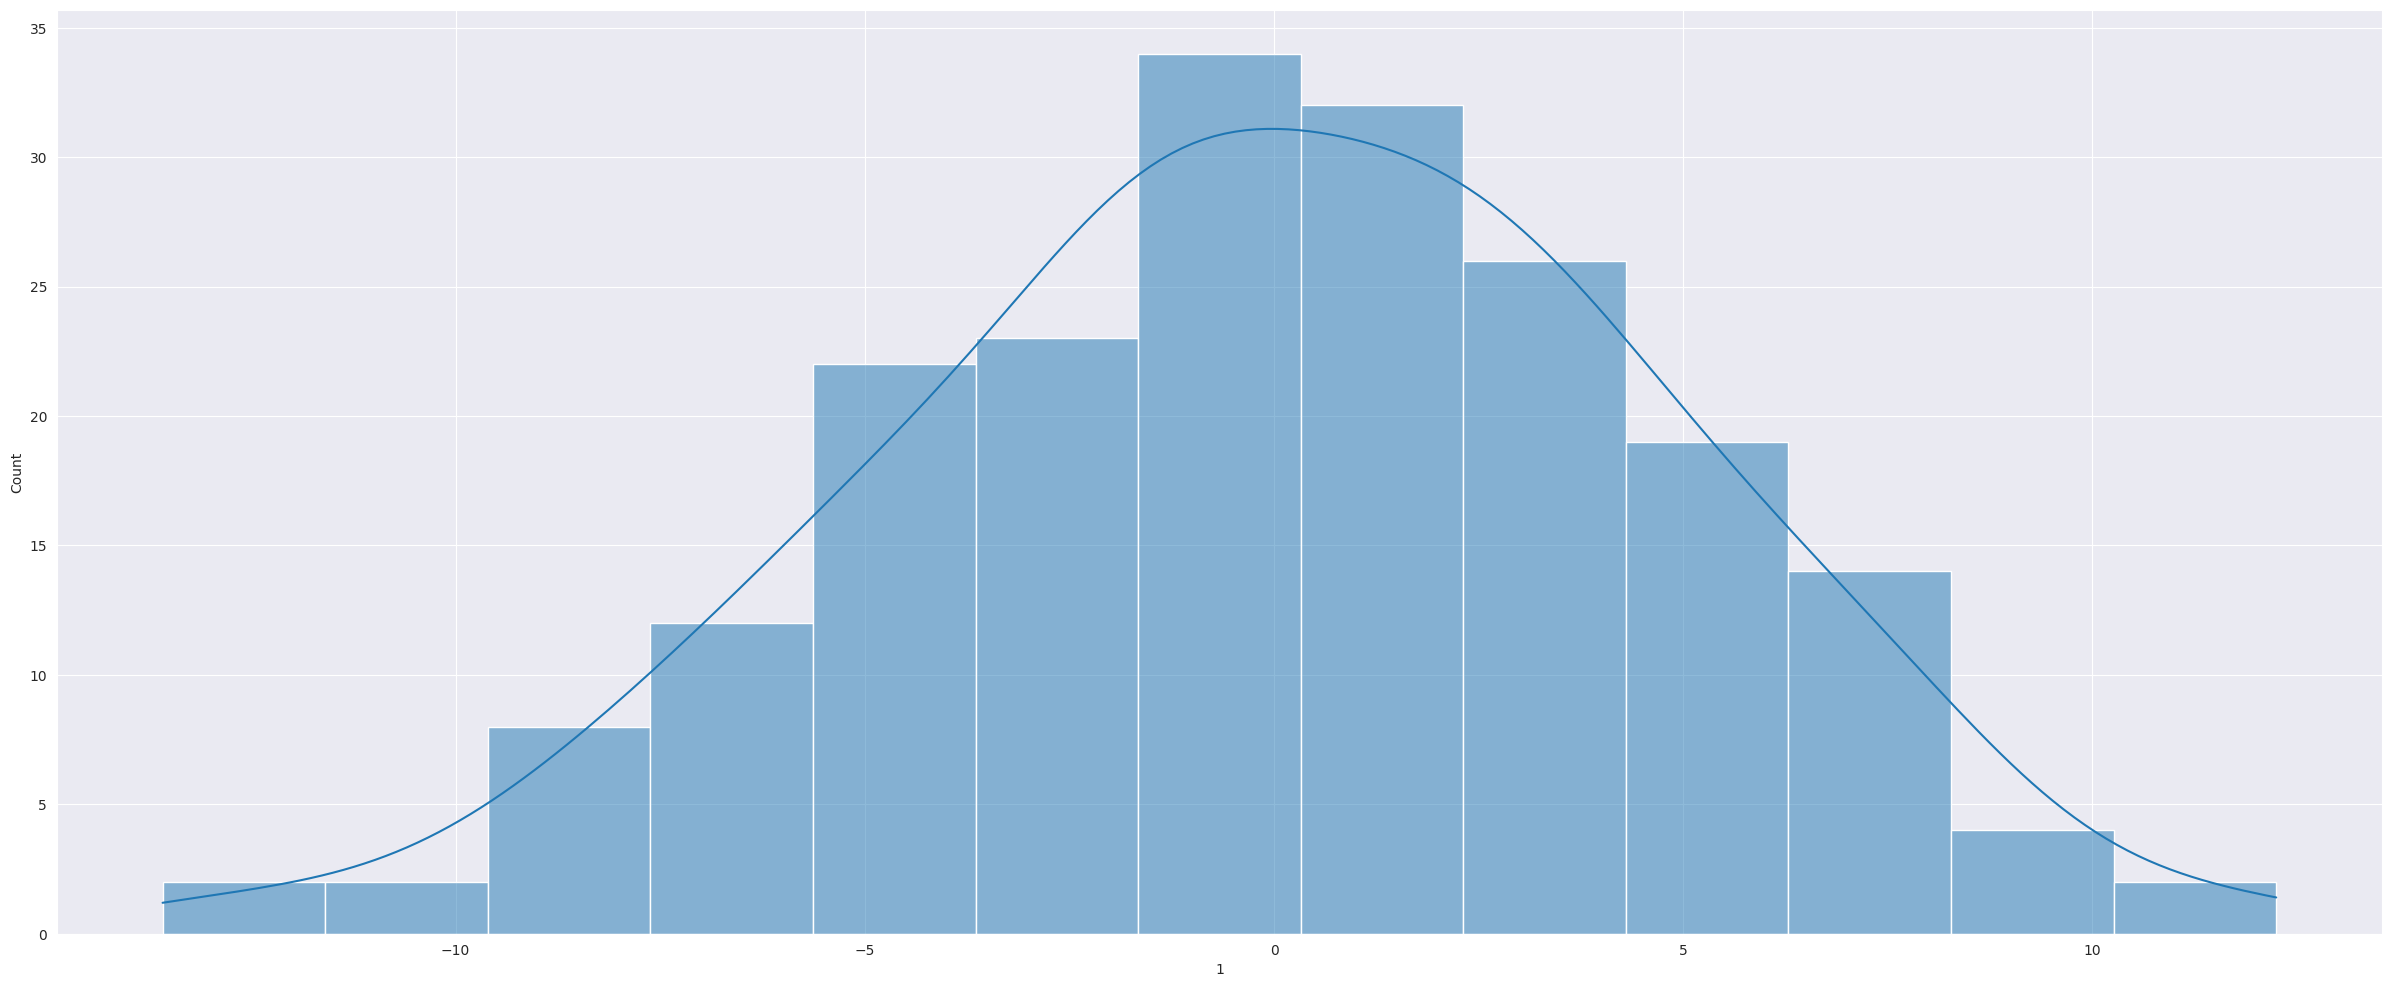

In [8]:
plt.figure(figsize=(30, 12))
sns.histplot(data[0], kde=True)
plt.show()

plt.figure(figsize=(30, 12))
sns.histplot(data[1], kde=True)
plt.show()

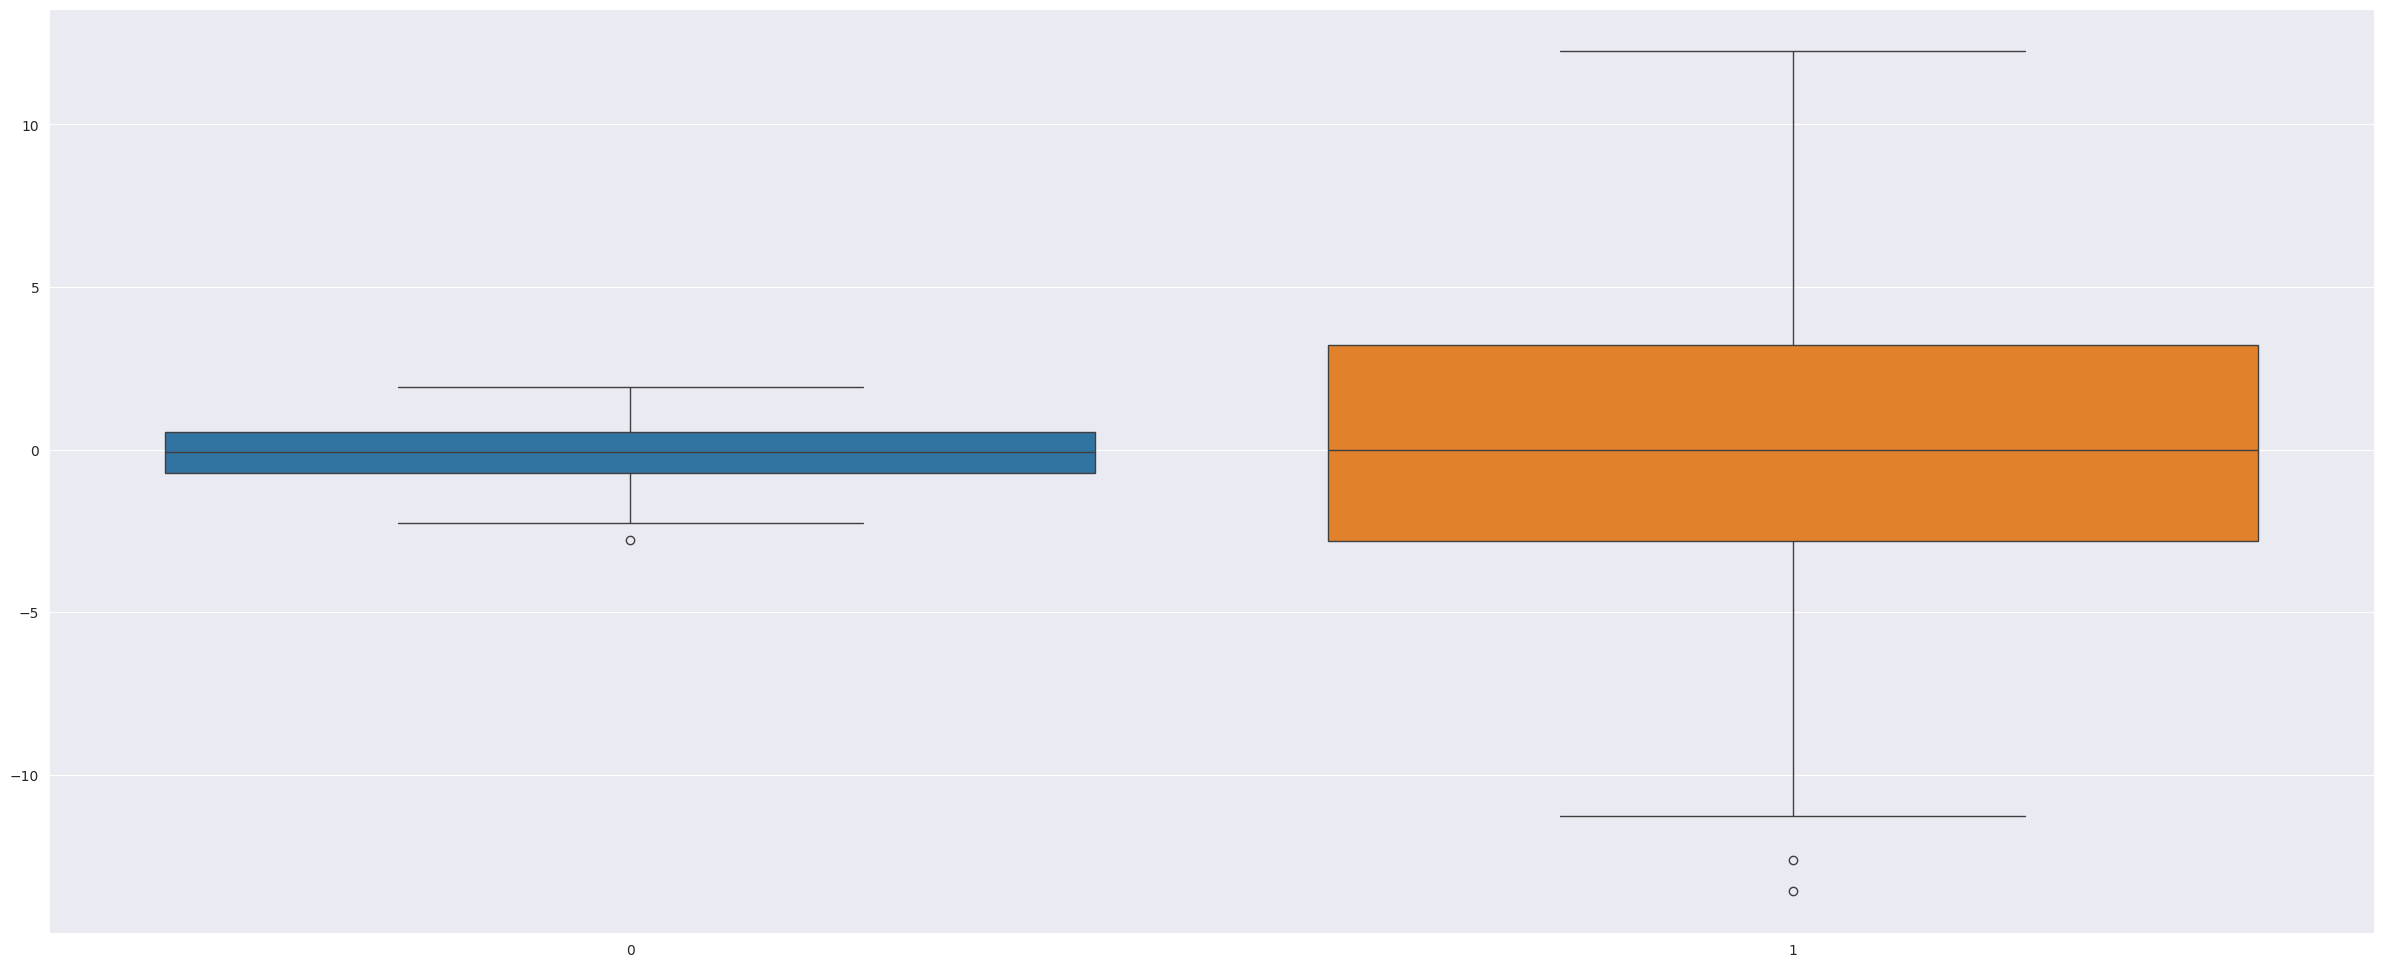

In [9]:
plt.figure(figsize=(30, 12))
sns.boxplot(data)
plt.show()

In [10]:
# Test de normalité

stat, p_value = shapiro(data[0])
print(f"Statistic : {stat} \t p_value : {p_value}")

stat, p_value = shapiro(data[1])
print(f"Statistic : {stat} \t p_value : {p_value}")

Statistic : 0.9899658158528163 	 p_value : 0.17664092750661858
Statistic : 0.9968226754249874 	 p_value : 0.9570689361968906


Les deux variables suivent une distribution normale

# Analyse bivariée

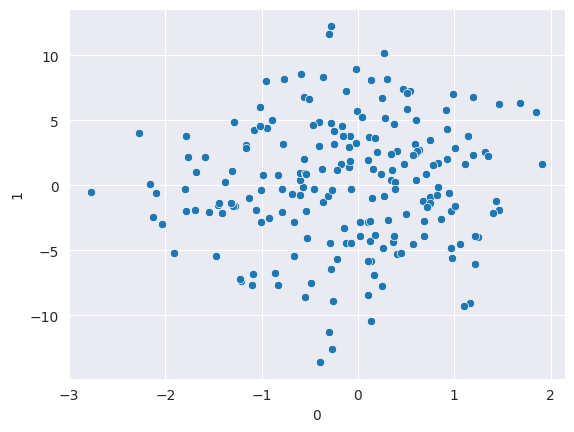

In [11]:
sns.scatterplot(data, x=0, y=1)
plt.show()

Nos deux variables semblent n'avoir aucun lien linéaire entre elles

In [12]:
# Test de spearman
stat, p_value = spearmanr(data[0], data[1])
print(f"Statistic : {stat} \t p_value : {p_value}")

Statistic : 0.07054826370659267 	 p_value : 0.3208625448362328


La p valeur est > 5% ; Donc nous ne pouvons pas rejetter l'hypothèse nulle et par conséquent nos deux variables sont belles et bien indépendantes.

# Analyse en Composantes Principales

In [13]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [14]:
index = data.index
columns = data.columns
X = data.values

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
n_components = 2

In [17]:
pca = PCA(n_components=n_components)
pca.fit(X_scaled)
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

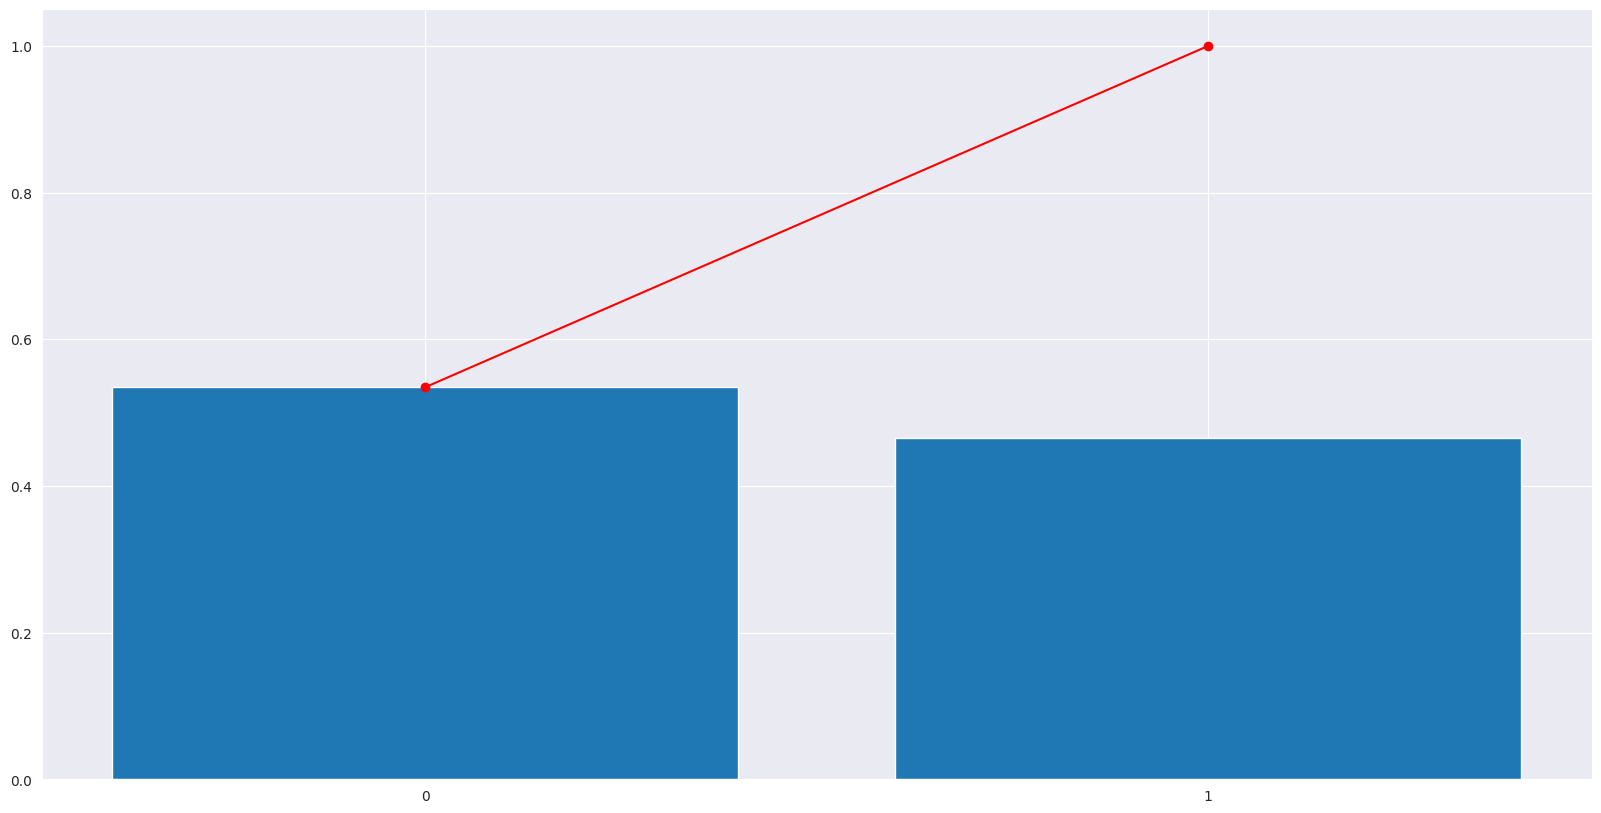

In [18]:
# Éboulies des valeurs propres

plt.figure(figsize=(20, 10))
plt.xticks(np.arange(n_components))
plt.bar(x=list(range(n_components)), height=explained_var)
plt.plot(cum_var, marker="o", color="red")
plt.show()

In [19]:
# Nous représenterons donc nos individus sur le premier plan factoriel
pcs = pca.components_
pcs = pd.DataFrame(pcs, columns=columns, index=[f"F{i+1}" for i in range(n_components)])
pcs.transpose()

,F1,F2
0,0.707107,-0.707107
1,0.707107,0.707107


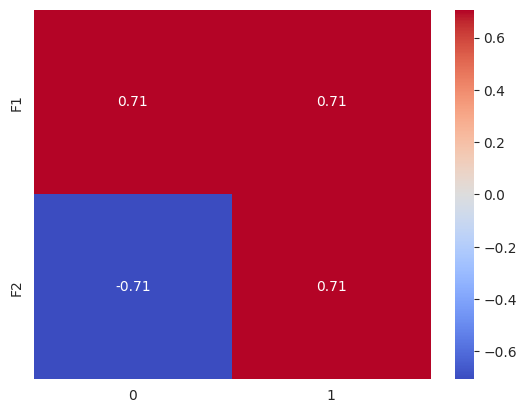

In [20]:
sns.heatmap(pcs, cmap="coolwarm", annot=True)
plt.show()

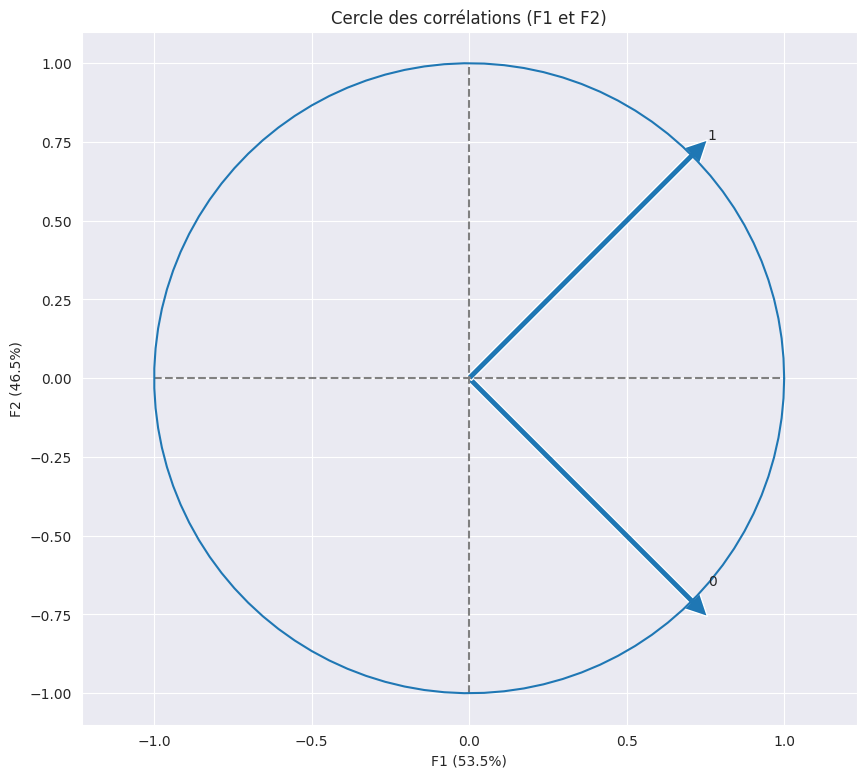

In [21]:
# Cercle des corrélations
x_y = (0, 1)
correlation_graph(pca, x_y, columns)

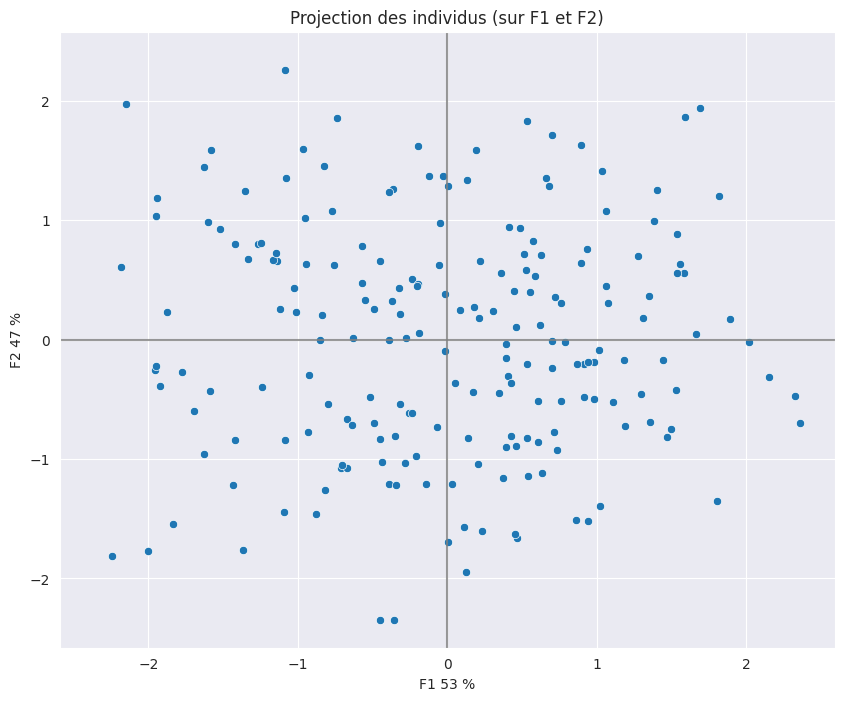

In [22]:
X_proj = pca.transform(X_scaled)
display_factorial_planes(X_proj, x_y, pca)

# Clustering / Classification hiérarchique des individus

In [23]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

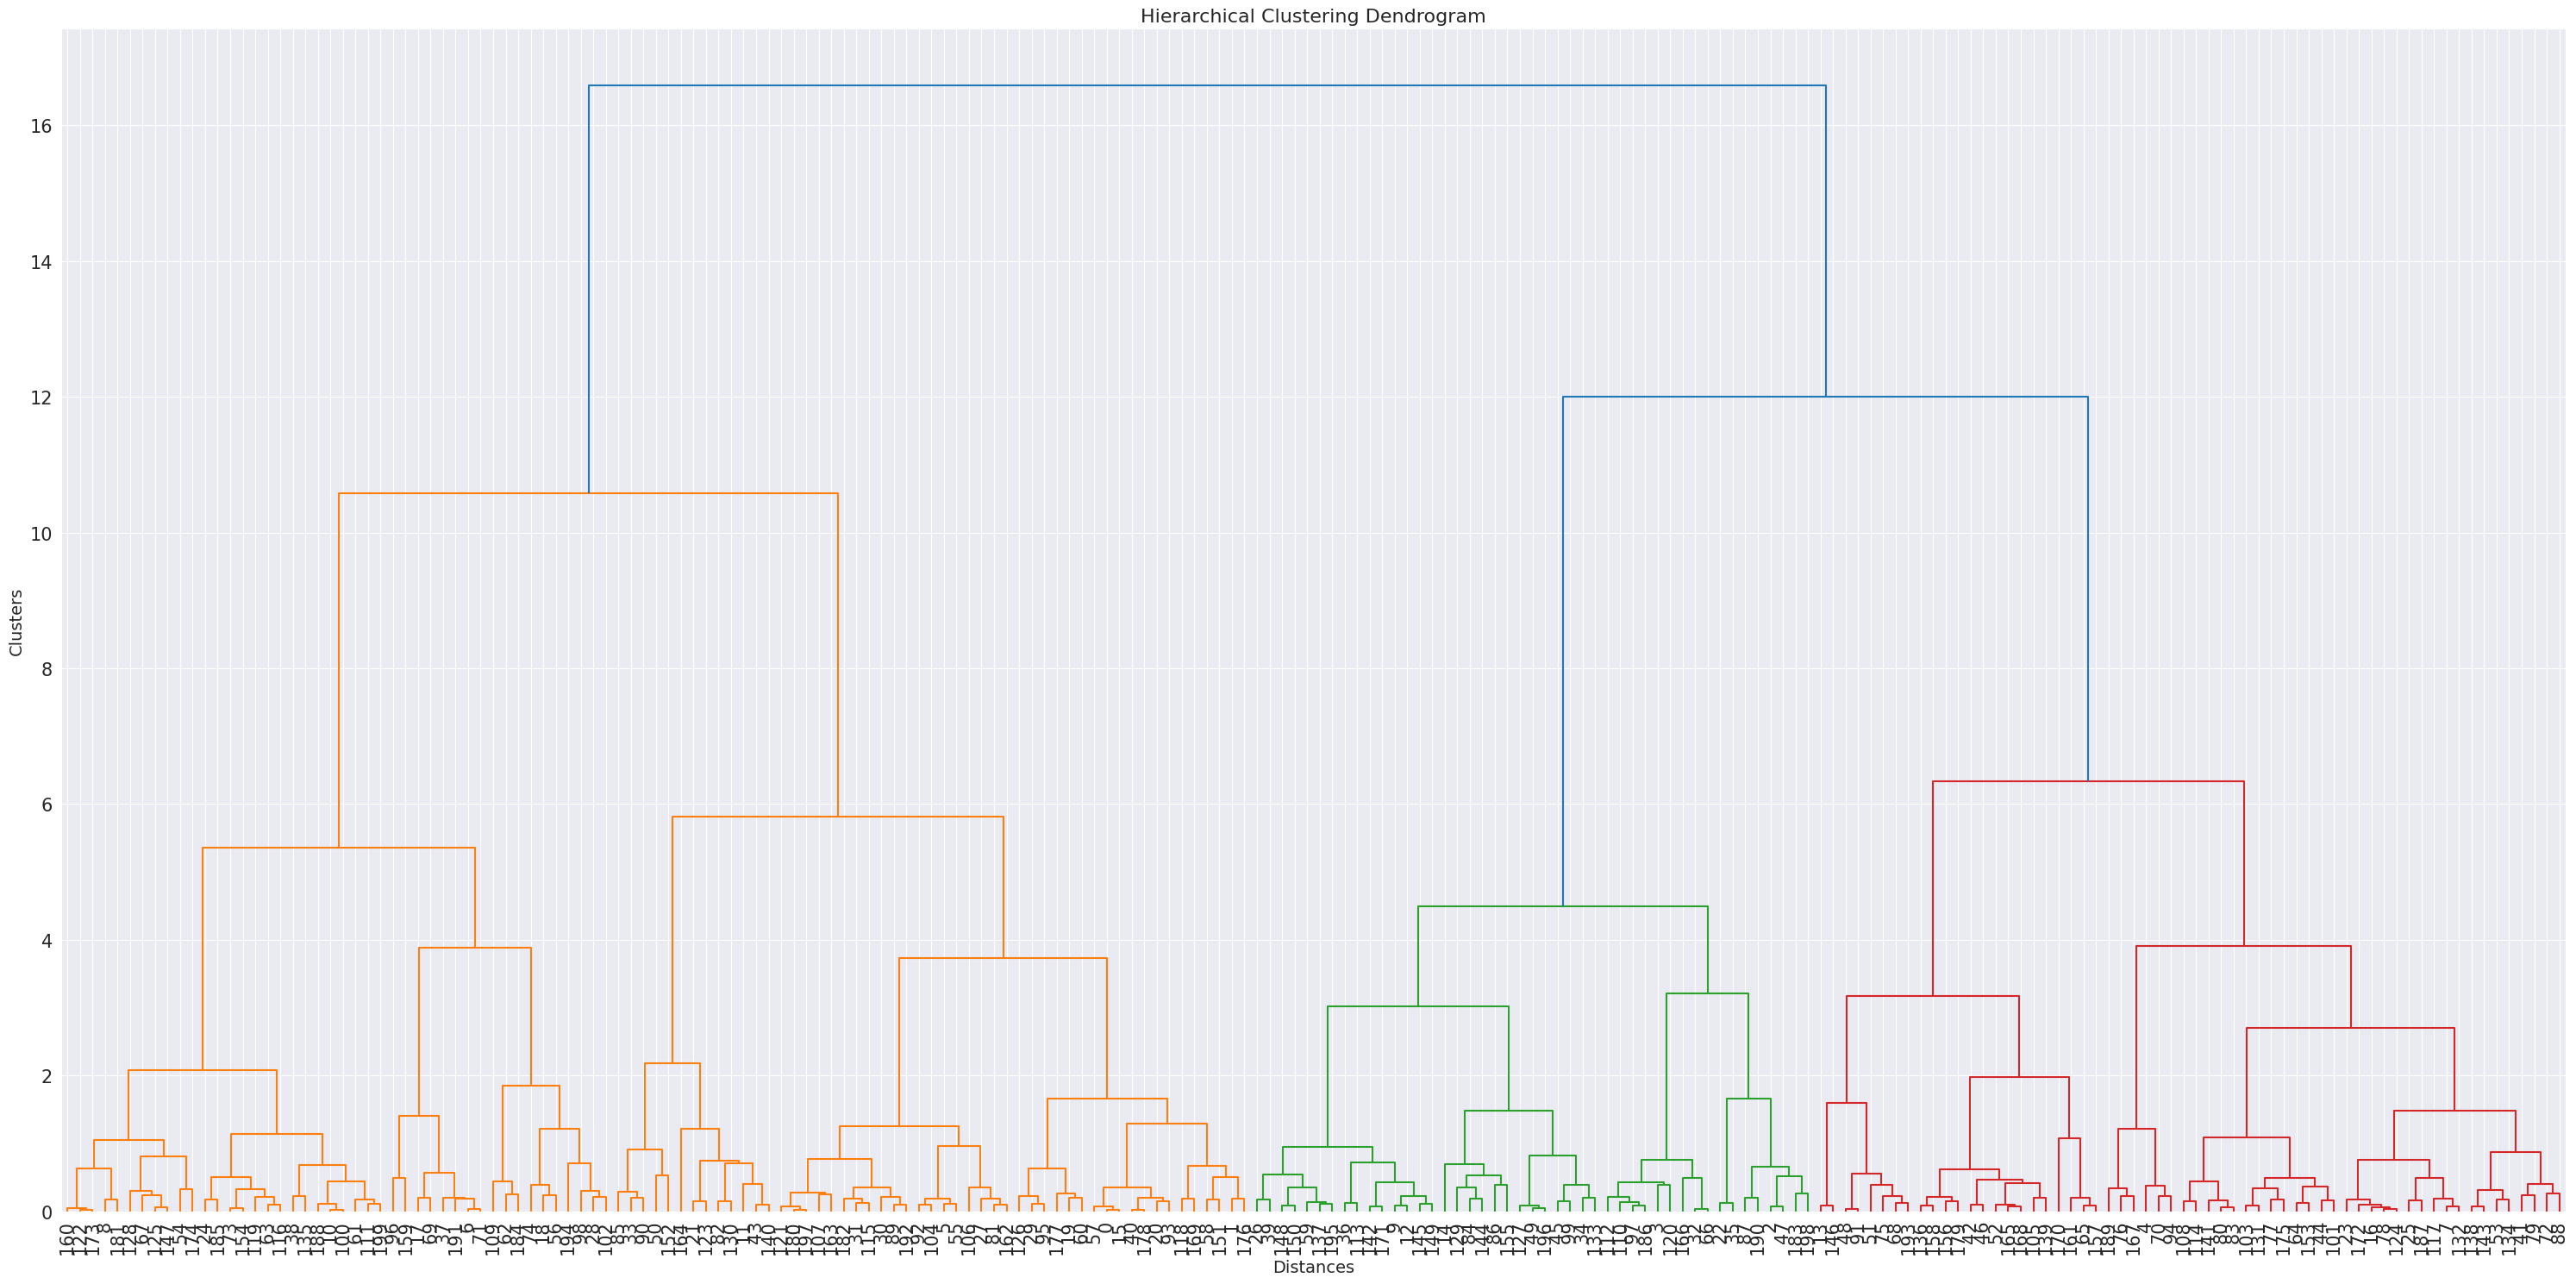

In [25]:
Z = linkage(X_scaled, method="ward")
plot_dendrogram(Z, labels=index, orientation="top", figsize=(30, 15))

In [26]:
from sklearn.metrics import silhouette_score

max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for n_clusters in range(2, max_clusters+1):
    Z = linkage(X_scaled, method='ward', metric='euclidean')
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

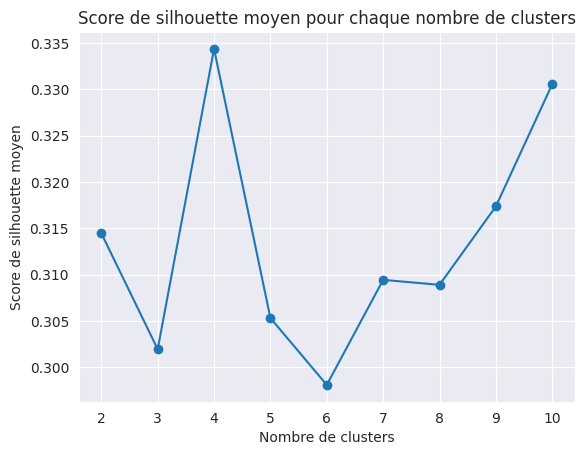

In [27]:
# Visualisation
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

In [28]:
# On choisira donc 5 clusters
n_clusters = 5

In [29]:
clusters = fcluster(Z, t=n_clusters, criterion="maxclust")

<Axes: xlabel='col_0', ylabel='row_0'>

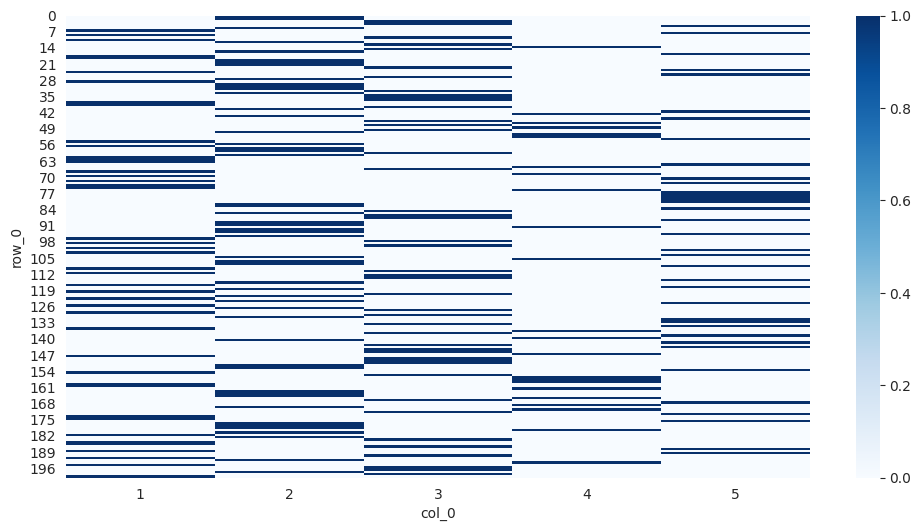

In [30]:
plt.figure(figsize=(12, 6))
crosstab = pd.crosstab(index, clusters, dropna=False)
sns.heatmap(crosstab, cmap="Blues", fmt="d")

In [31]:
data["clusters"] = clusters

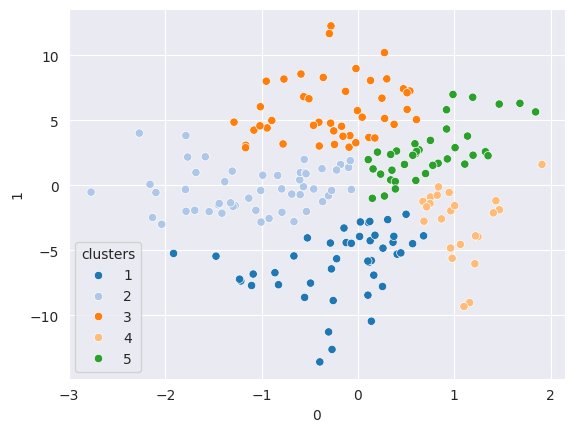

In [32]:
sns.scatterplot(data, x=0, y=1, hue="clusters", palette="tab20")
plt.show()